In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn 
from pandas import Series, DataFrame 
from pylab import rcParams 
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression 
from sklearn.cross_validation import train_test_split 
from sklearn import metrics 
from sklearn.metrics import classification_report 

C:\Users\SUMIT\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
url="https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"

In [4]:
titanic=pd.read_csv(url)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked'],axis=1,inplace=True)

In [8]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [11]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [12]:
#this gives the percentage of data in each column which has null value

titanic.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
dtype: float64

In [14]:
# we are dropping the passengers whose age is null or not given
titanic = titanic.dropna(subset=['Age'])

In [15]:
titanic.shape

(714, 7)

In [ ]:
#impute_na(X_train, 'Age', median)
#X_train.head(15)

In [ ]:
# import seaborn as sns
# #get correlations of each features in dataset
# corrmat = data.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
X = titanic.drop(['Survived'],axis=1)
y = titanic['Survived']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 2103)

In [20]:
y_train.head()

430    1
276    0
34     0
322    1
328    1
Name: Survived, dtype: int64

In [24]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
430,1,0,28.0,0,0,26.5500
276,3,1,45.0,0,0,7.7500
34,1,0,28.0,1,0,82.1708
322,2,1,30.0,0,0,12.3500
328,3,1,31.0,1,1,20.5250


In [23]:
x_train['Sex'].replace({'male':0,'female':1},inplace=True)

C:\Users\SUMIT\Anaconda3\lib\site-packages\pandas\core\generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [25]:
#let's first visualize the tree on the data without doing any pre processing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [26]:
clf.score(x_train,y_train)

0.99198396793587174

In [28]:
x_test['Sex'].replace({'male':0,'female':1},inplace=True)

C:\Users\SUMIT\Anaconda3\lib\site-packages\pandas\core\generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [29]:
py_pred = clf.predict(x_test)

In [30]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.76279069767441865

In [38]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [44]:
x_transform.shape

(714, 6)

In [36]:
X.shape

(714, 6)

In [37]:
X['Sex'].replace({'male':0,'female':1},inplace=True)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

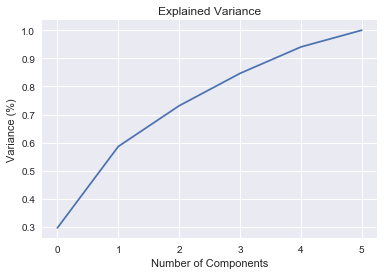

In [40]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [47]:
pca = PCA(n_components=6)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])

In [48]:
principal_x.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
0,-1.105917,0.793280,0.618451,-0.342738,-0.297072,0.218397
1,1.608535,-0.954960,-0.596450,-0.443895,-1.077254,-0.198725
2,-0.588509,0.379252,-1.617860,-0.226003,-0.189657,0.502770
3,1.398141,-0.766568,-0.689636,-0.473508,-1.115200,-0.463646
4,-1.400326,-0.240444,0.196327,0.259804,0.161251,0.450832


In [49]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.73488372093023258

In [50]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']   
}

In [53]:
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1)

In [52]:
from sklearn.model_selection import GridSearchCV

In [54]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(2, 32), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10), 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [55]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 4, 'splitter': 'random'}


In [56]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=24,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')

In [57]:
clf.score(x_test,y_test)

0.73023255813953492

In [62]:
import pydotplus
feature_name=X.columns
class_name = y_train.unique()
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

C:\Users\SUMIT\Anaconda3\lib\site-packages\sklearn\tree\export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


TypeError: object of type 'NoneType' has no len()

In [65]:
# let's save the model
import pickle

with open('D:\Model files'+ '/modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)
    
with open('D:\Model files'+ '/standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

with open('D:\Model files'+ '/pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)